In [1]:
!pip install torchvision
!pip install pytorch-lightning

In [1]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
import torchvision.transforms as T
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [14]:
import torch
import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

In [3]:
train_transform = T.Compose([
    T.Resize((224,224)),
    T.RandomHorizontalFlip(p=0.2),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])
val_transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225),)
])

In [4]:
train_data = datasets.ImageFolder(r"D:\Dataset\train", transform=train_transform)
val_data = datasets.ImageFolder(r"D:\Dataset\val", transform=val_transform)

In [5]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

In [6]:
n_train = len(train_loader.dataset)
n_val = len(val_loader.dataset)

In [7]:
n_train,n_val

(7517, 1614)

In [8]:
n_train,n_val

(7517, 1614)

In [9]:
images, labels = next(iter(train_loader))

In [10]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

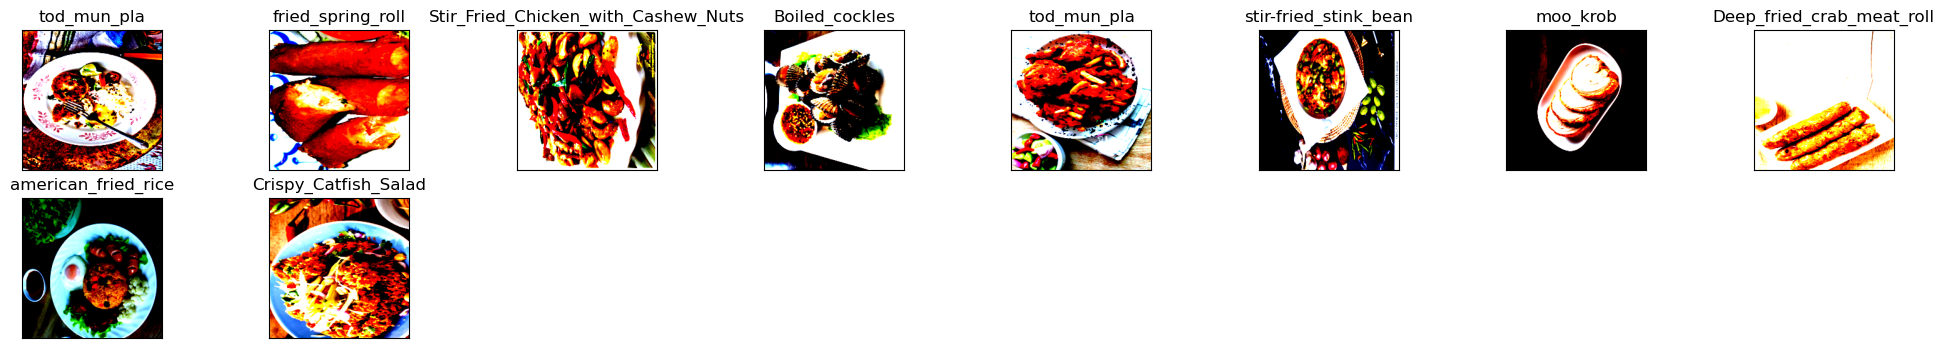

In [11]:
idx2_class = {v: k for k, v in train_data.class_to_idx.items()}
fig = plt.figure(figsize=(25, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i])
    label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(label)

In [15]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2e-3)

In [16]:
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

False


In [21]:
import torch
import torch.nn as nn

class Food_Model(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 28 * 28, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Create the lightweight model
num_classes = 54  
model = Food_Model(num_classes)


In [22]:
n_epochs = 70
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889843876221973, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889793538723723, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889798589378844, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988982045937523, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889793256123016, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889839538253495, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988983097142388, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889803784664633, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988981754868307, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988981332584821, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889796955940398, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889788215617417, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889836582840004, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889806390554012, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889801005916232, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889803150636776, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988982358828209, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988983239616281, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889819696575337, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889835186012252, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889800884756332, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889795546742914, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889826795213383, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988980736903122, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889827641746822, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988980030528215, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889823192133615, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988983365660639, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889836031911345, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889812734004297, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988982453345618, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889822114381412, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988983494876721, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889784167227442, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889807520639677, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889807345877624, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889804579181782, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988981799399328, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988982601211444, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988983115062635, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988981304197881, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889796111944333, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988980821080707, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889804486884577, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988983145320893, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889806116516957, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889810605459552, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889829192403243, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988980593414276, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889822000833655, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889873929269233, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889833758418765, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988981653087647, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889827709938914, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988982535049258, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889806023268237, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889803050727433, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988983079571031, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988985603312728, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889787145794524, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988977442876256, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889807251043043, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988981412956336, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988980190605183, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889792138724247, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988980506001531, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988981086141777, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.988982755579307, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889846482111353, Validation loss = 3.9889663799101536


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Training loss = 3.9889799953220657, Validation loss = 3.9889663799101536


In [23]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

  0%|          | 0/51 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.06      0.13      0.09        30
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        30
           5       0.01      0.20      0.02        30
           6       0.00      0.00      0.00        30
           7       0.03      0.03      0.03        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        29
          14       0.05      0.07      0.05        30
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        30
          17       0.00    

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
